# Objective of the Model

The primary objective of this model is to identify and quantify the key factors influencing bike bookings. By understanding these predictors, the model aims to:

- Provide actionable insights to optimize bike availability and resource allocation.
- Forecast bike demand under varying environmental, temporal, and situational conditions.
- Support strategic decision-making to maximize customer satisfaction and revenue.

This analysis will help prioritize critical variables, enabling effective planning and operational efficiency.

# Import Packages

In [18]:
# Basic packages for data handling and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For creating visually appealing statistical plots
import matplotlib
import matplotlib.pyplot as plt  # For plotting and data visualization

# For splitting the dataset into training and testing sets
import sklearn
from sklearn.model_selection import train_test_split  

# For scaling numerical variables to a specific range
from sklearn.preprocessing import MinMaxScaler  

# For checking Variance Inflation Factor (VIF) to detect multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor  

# For building and analyzing linear regression models
import statsmodels
import statsmodels.api as sm  

# For feature selection and linear regression modeling
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for selecting important features
from sklearn.linear_model import LinearRegression  # To build a linear regression model

# For calculating the R-squared value, which indicates model performance
from sklearn.metrics import r2_score  

In [19]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Statsmodels version:", statsmodels.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.8.4
Scikit-learn version: 1.4.2
Statsmodels version: 0.14.2
Seaborn version: 0.13.2


# Import Dataset

In [21]:
bike = pd.read_csv("day.csv")

In [22]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping columns that do not add value
- Since we already have derived variables based on date - we can remove dteday column
- The column instant can be removed as it is just index
- Columns casual and registered can be removed as they are not features that can define cnt

In [24]:
cols_to_remove = ['instant','dteday','casual','registered']
bike = bike.drop(columns = cols_to_remove)

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bike.shape

(730, 12)

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [28]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Replace values of season and weathersit based on data dictionary

In [30]:
bike.groupby('season')['cnt'].count()

season
1    180
2    184
3    188
4    178
Name: cnt, dtype: int64

In [31]:
bike.groupby('weathersit')['cnt'].count()

weathersit
1    463
2    246
3     21
Name: cnt, dtype: int64

In [32]:
bike['season'] = bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.groupby('season')['cnt'].count()

season
fall      188
spring    180
summer    184
winter    178
Name: cnt, dtype: int64

In [33]:
bike['weathersit'] = bike['weathersit'].replace({1:'clear', 2:'misty', 3:'rainy'})
bike.groupby('weathersit')['cnt'].count()

weathersit
clear    463
misty    246
rainy     21
Name: cnt, dtype: int64

# Univariate and Bivariate Analysis

## Box plot of numeric variables - univariate

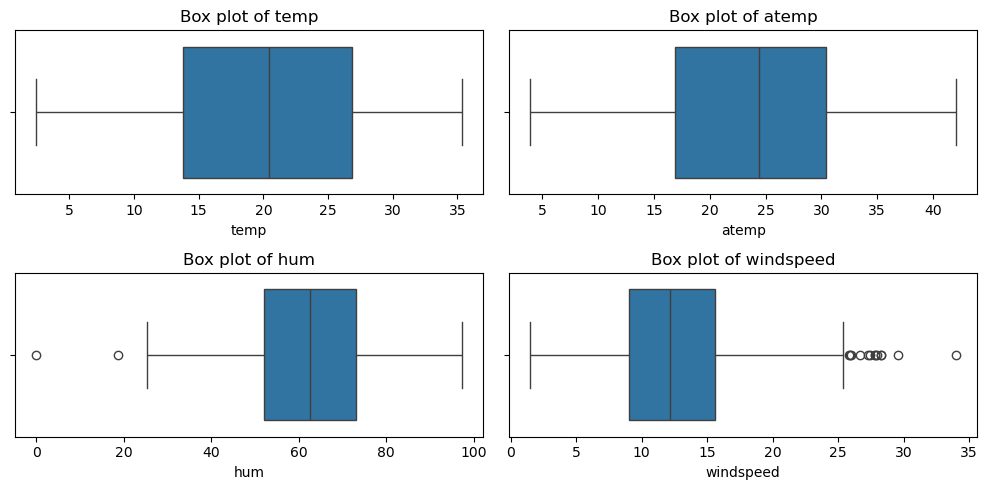

In [36]:
numeric_cols = ['temp','atemp','hum','windspeed']

plt.figure(figsize=(10,5))

for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=bike, x=col)
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

## Histogram of all numeric columns

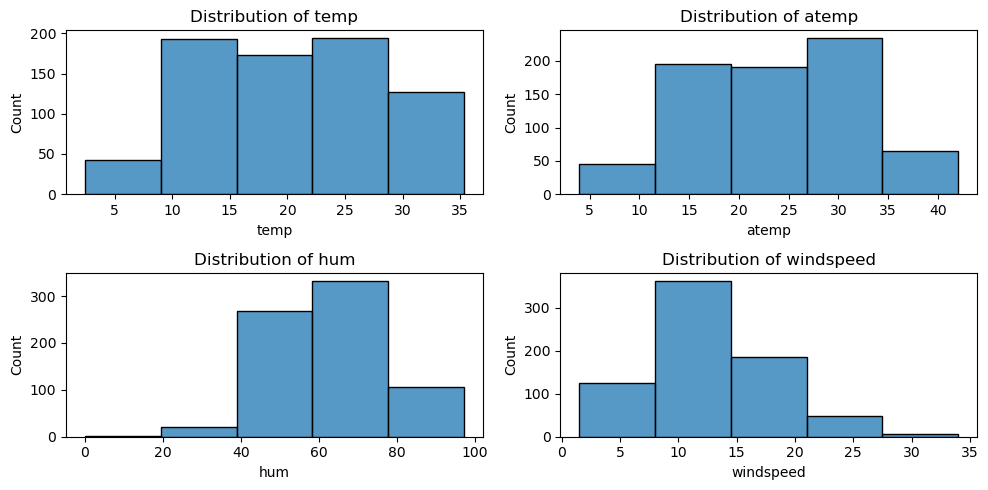

In [38]:
plt.figure(figsize = (10,5))
for i,col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(bike[col], bins = 5, kde=False)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Distribution of numeric columns through bar chart after binning them

In [40]:
def plot_cnt_distribution(df, column, cnt_column, bins):
    """
    Plots the distribution of `cnt_column` sums across bins of a given column.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        column (str): Name of the column to bin.
        cnt_column (str): Name of the column to aggregate (e.g., `cnt`).
        bins (list or int): Bin edges or number of bins for `pd.cut`.
    """
    # Define bins for the column
    labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
    df[f'{column}_bins'] = pd.cut(df[column], bins=bins, labels=labels, right=False)

    # Group by bins and sum the cnt column
    grouped = df.groupby(f'{column}_bins', observed = False)[cnt_column].sum().reset_index()

    # Plot histogram using bar chart
    plt.bar(grouped[f'{column}_bins'], grouped[cnt_column], color='skyblue', edgecolor='black')
    plt.xlabel(f'{column.capitalize()} Range')
    plt.ylabel(f'Sum of {cnt_column}')
    plt.title(f'Distribution of {cnt_column} Sum Across {column.capitalize()} Bins')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

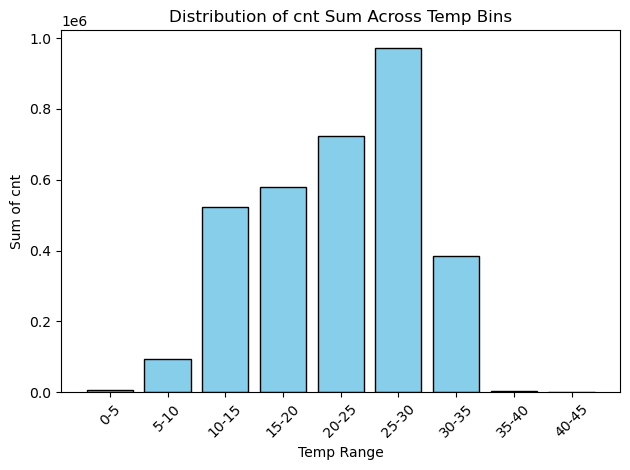

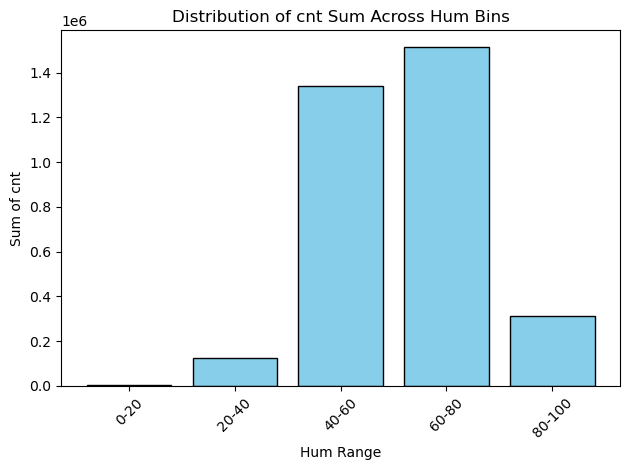

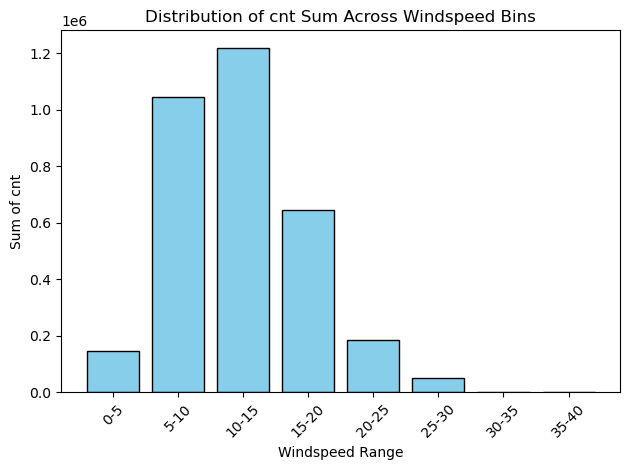

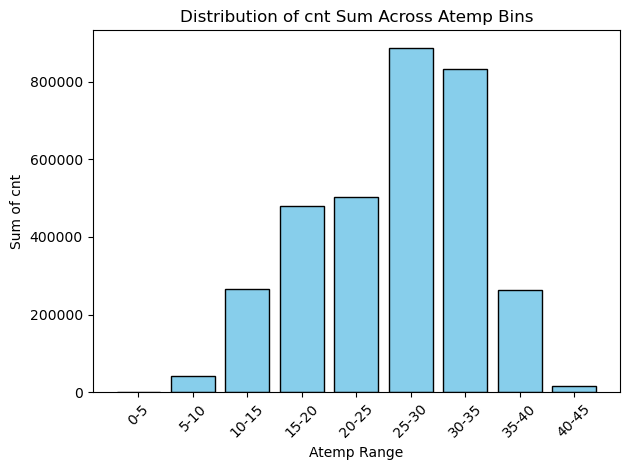

In [41]:
# Define bins for each column
temp_bins = [0,5,10,15,20,25,30,35,40,45]
atemp_bins = [0,5,10,15,20,25,30,35,40,45]
windspeed_bins = [0,5,10,15,20,25,30,35,40]
hum_bins = [0,20,40,60,80,100]

df = bike.copy()

# Use the function to plot for each column
for col, bins in zip(['temp', 'hum', 'windspeed', 'atemp'], 
                     [temp_bins, hum_bins, windspeed_bins, atemp_bins]):
    plot_cnt_distribution(df, col, 'cnt', bins)

- no extreme outliers observed
- lower demand observed during days with extreme temperatures (both hot and cold)
- lower demand observed during days with extreme humidity (especially low humidity)
- lower demand observed during days with extreme windspeed (especially high windspeed)
 

## Bar plot of categorical/binary variables with cnt - Bivariate

In [44]:
def barplot_categorical_sum(df, categorical_columns, cnt_column):
    """
    Creates bar plots for multiple categorical columns showing the sum of a numerical column.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): List of categorical column names.
        cnt_column (str): The name of the numerical column to sum.
    
    Returns:
        None
    """
    # Set the overall figure size
    num_cols = len(categorical_columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(5, 3 * num_cols))

    # Ensure axes is iterable even for a single plot
    if num_cols == 1:
        axes = [axes]

    for i, col in enumerate(categorical_columns):
        grouped = df.groupby(col)[cnt_column].sum().reset_index()

        # Sort values for better visualization
        grouped = grouped.sort_values(by=cnt_column, ascending=False)

        # Bar plot for each categorical column
        axes[i].bar(grouped[col], grouped[cnt_column], color='skyblue', edgecolor='black')
        axes[i].set_title(f"Sum of {cnt_column} by {col}", fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel(f"Sum of {cnt_column}", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

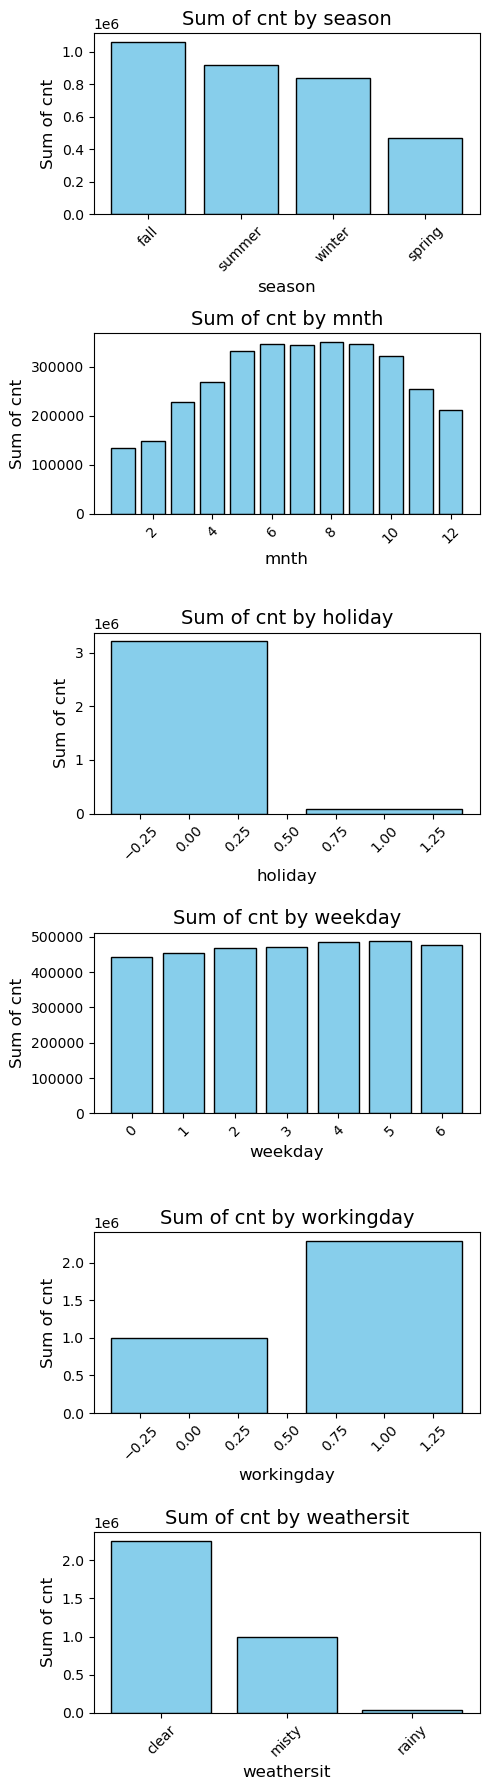

In [45]:
# List of categorical columns
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Call the function
barplot_categorical_sum(df, categorical_columns, cnt_column='cnt')

- higher demand observed in fall and least in spring
- negligible demand observed on holidays
- higher demand observed in Q2 and Q3
- negligible demand observed on rainy days and highest demand on those days with clear sky
- no significant difference based on day of week - but less demand during 0 and 1 (assuming sat and sun)


## Pairplot for numeric variables with cnt

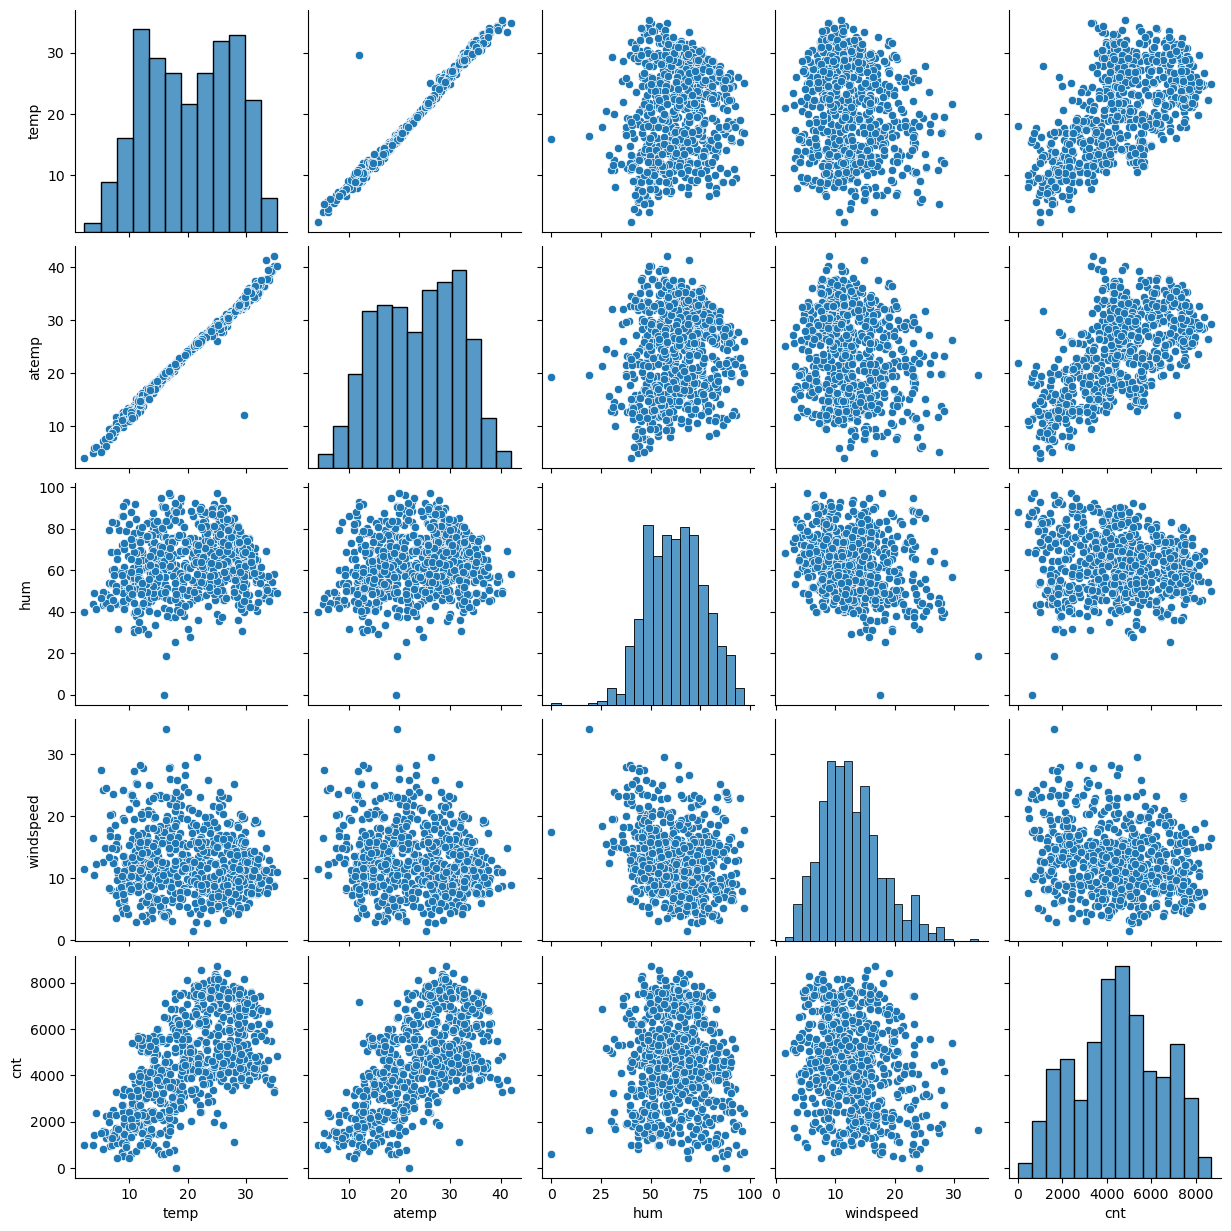

In [48]:
columns = ['temp','atemp','hum','windspeed','cnt']
# Create a subset of the DataFrame with the selected columns
subset_df = df[columns]
# Create a pairplot
sns.pairplot(subset_df)
# Show the plot
plt.show()

- temp and atemp are highly correlated
- temp and cnt are positively correlated

## Visualize category level distribution of each variable with cnt through box plots

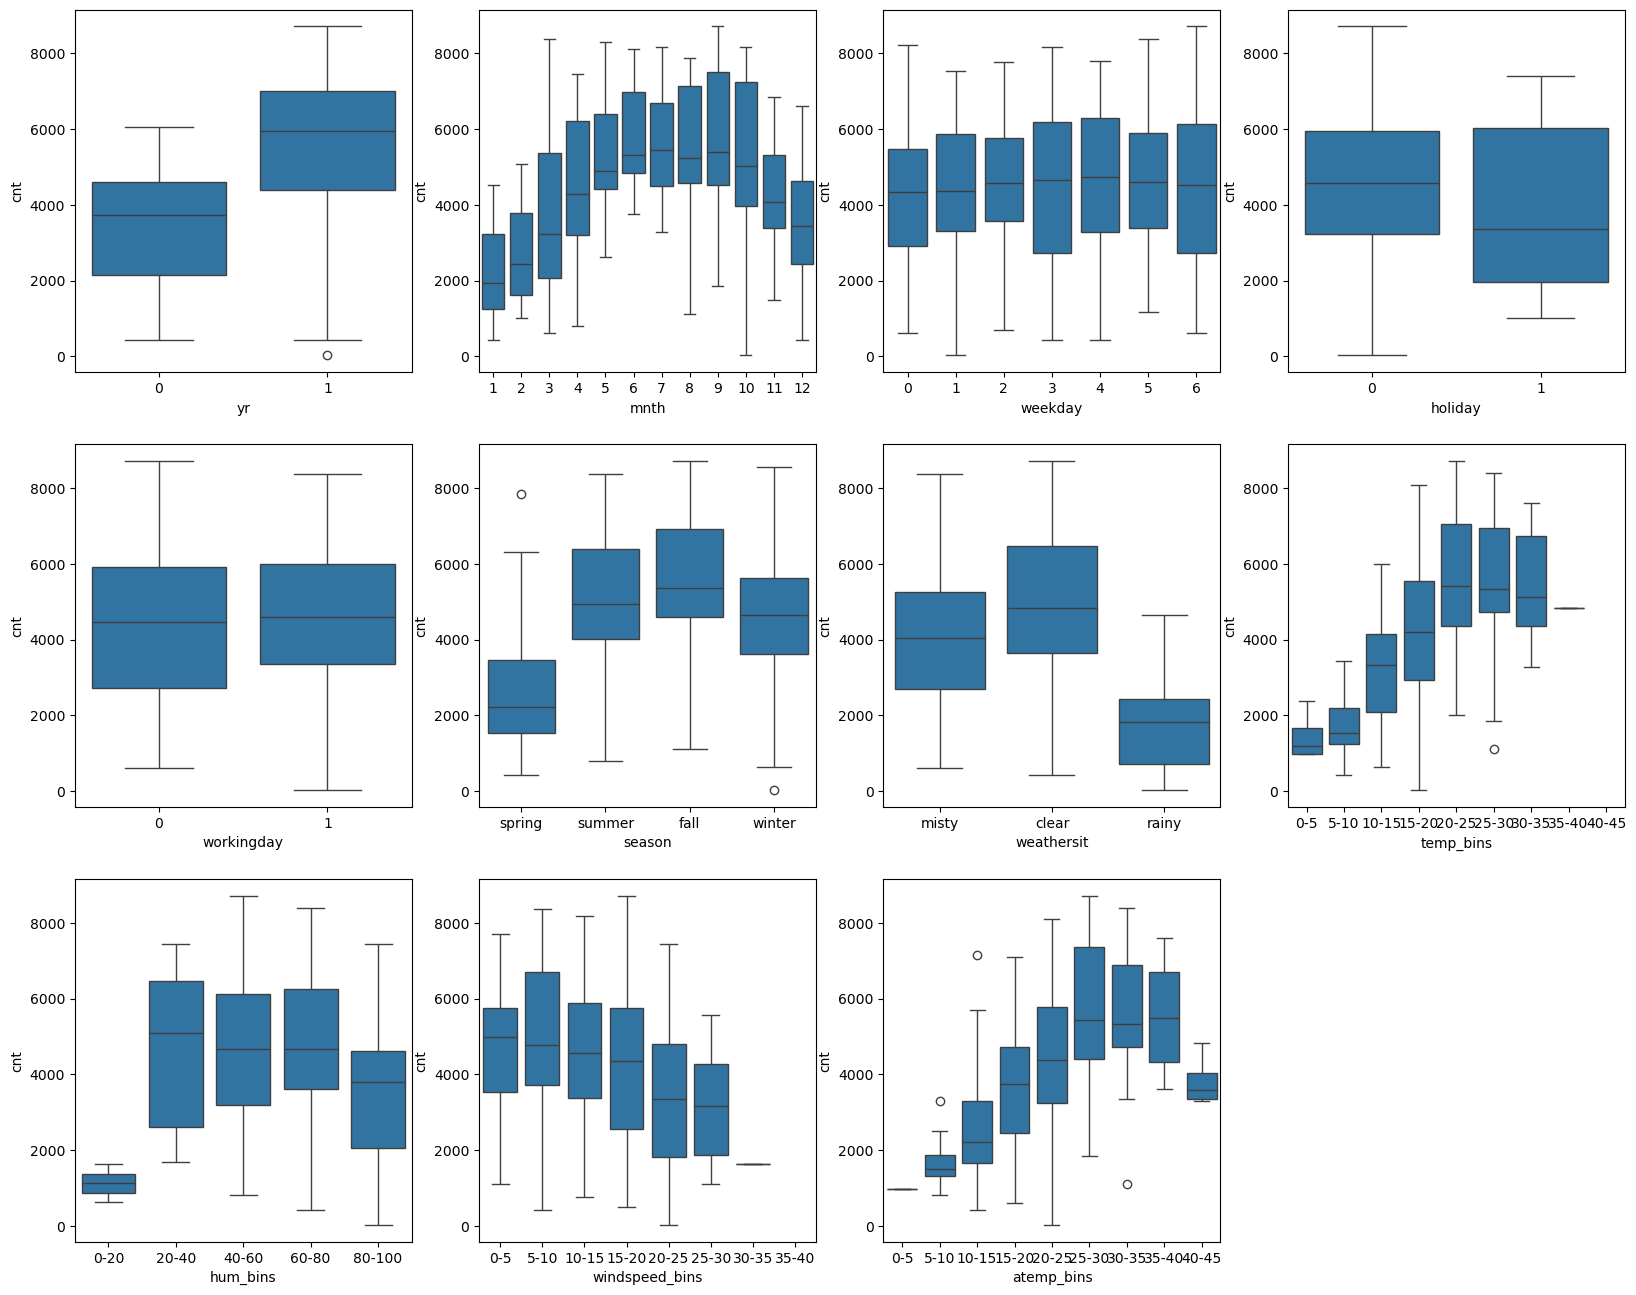

In [51]:
# List of the columns to plot against 'cnt'
columns = ['yr','mnth', 'weekday', 'holiday', 'workingday', 'season', 'weathersit' , 'temp_bins', 'hum_bins', 'windspeed_bins', 'atemp_bins']

plt.figure(figsize=(20, 16))

# Loop through each column and create a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=col, y='cnt', data=df)

plt.show()

## Multivariate Analysis

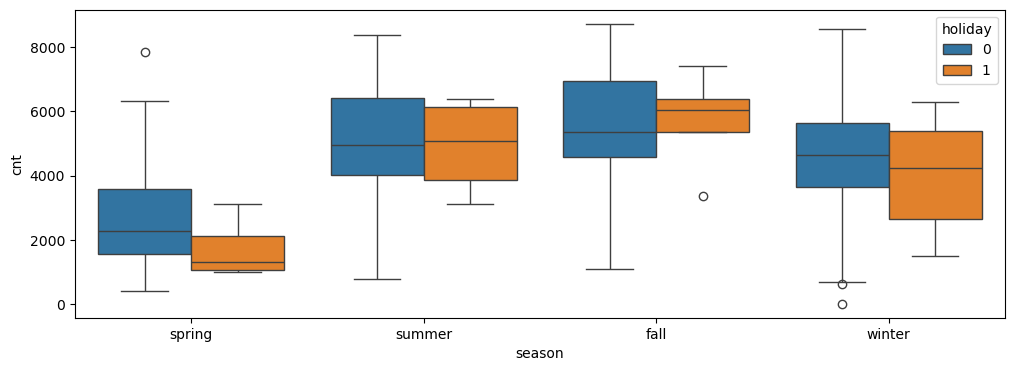

In [53]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = df)
plt.show()

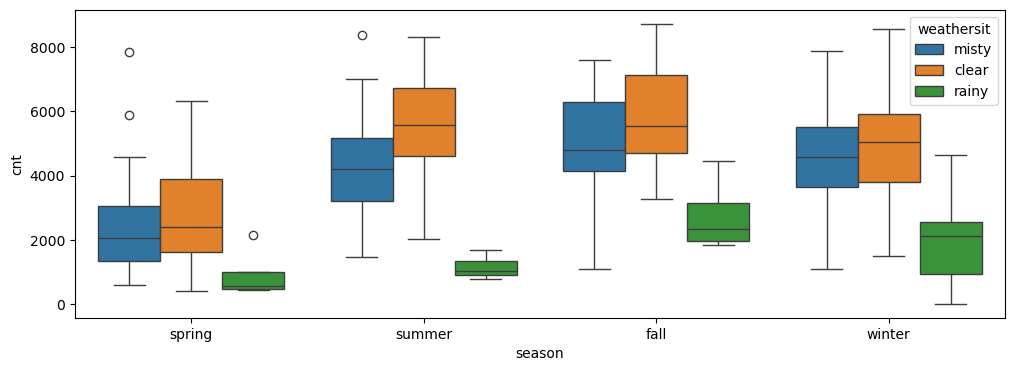

In [54]:
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike)
plt.show()

- Summer has no significant change in demand on both holidays and working days
- Interestingly in Fall season, higher median demand is observed on holidays than working days
- Irrespective of season, rainy days have significantly lower demand

# Data Preparation

In [57]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## convert the columns - season, mnth, weekday, weathersit into dummies

In [59]:
df_model = pd.get_dummies(bike, columns = ['season','mnth','weekday','weathersit'], drop_first = True)
df_model.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_misty,weathersit_rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,True,False,False,False,False,False


In [60]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_spring     730 non-null    bool   
 9   season_summer     730 non-null    bool   
 10  season_winter     730 non-null    bool   
 11  mnth_2            730 non-null    bool   
 12  mnth_3            730 non-null    bool   
 13  mnth_4            730 non-null    bool   
 14  mnth_5            730 non-null    bool   
 15  mnth_6            730 non-null    bool   
 16  mnth_7            730 non-null    bool   
 1

## Splitting the Data into Training and Testing Sets

In [62]:
np.random.seed(0)
df_train, df_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [63]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [64]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


### Correlation Matrix

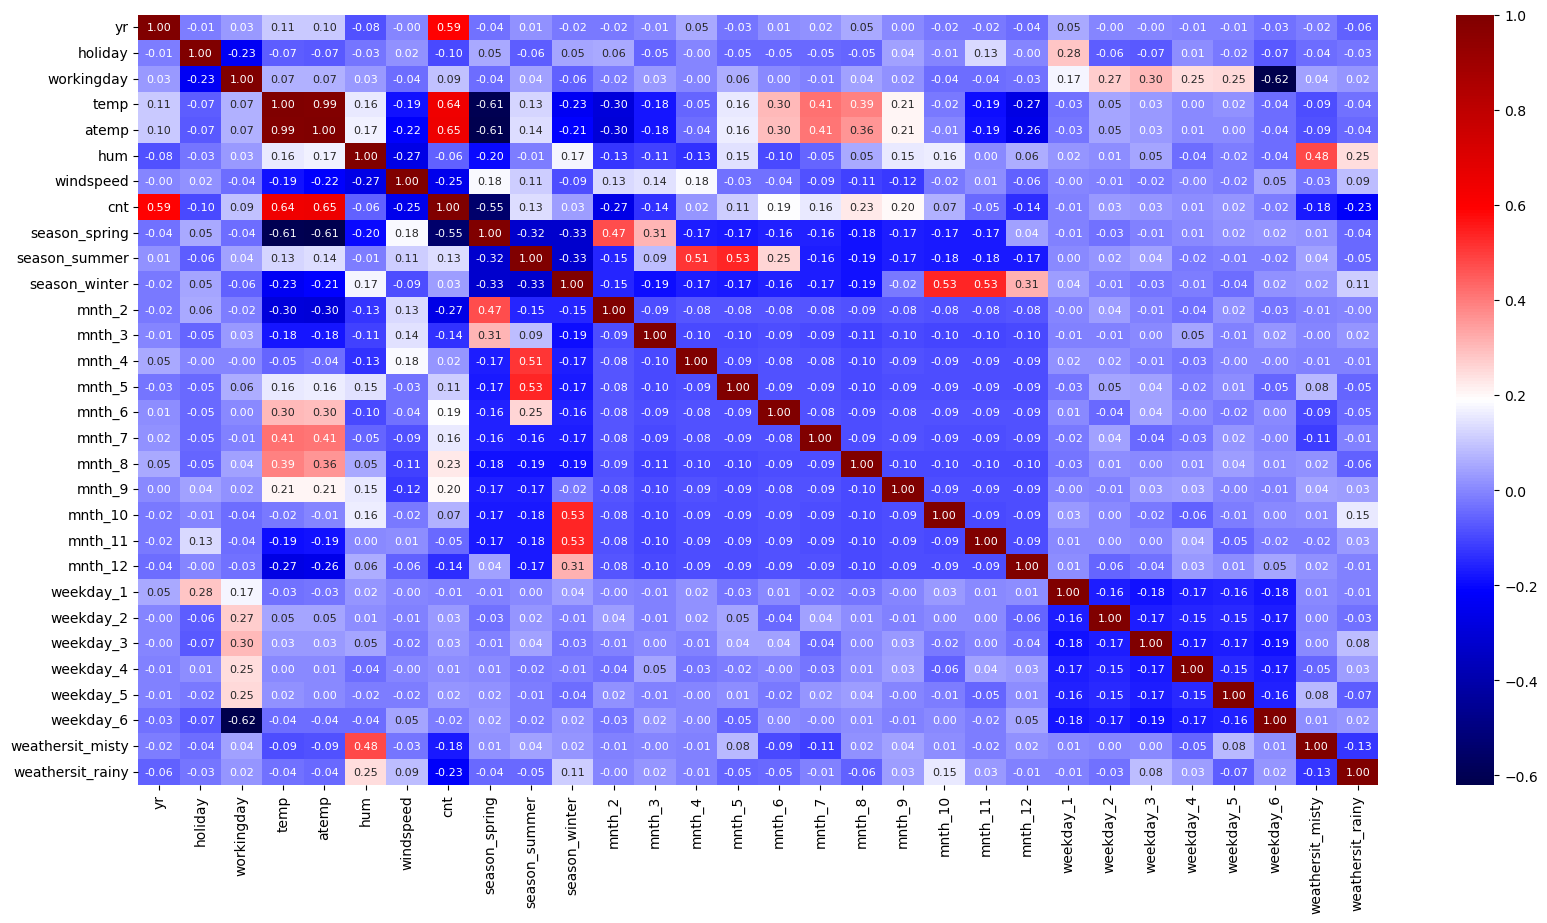

In [66]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="seismic", fmt=".2f", annot_kws={"size": 8})
plt.show()

Major Correlations
- cnt is majorly positively correlated with yr, temp, atemp and negatively correlated with weathersit_rainy, weathersit_misty and season_spring
- Lot of correlations observed between temp, season and months and correlation observed between weekdays and workingday, More details below:

- temp and atemp are highly correlated
- temp and season_spring have negative correlation (-0.61)
- workingday and weekday_6 have negative correlation (-0.62), and has positive correlation with weekday_1 to weekday_5
- mnth_10 to mnth_12 are positively correlated with season_winter
- mnth_4 to mnth_6 are positively correlated with season_summer
- mnth_2 to mnth_3 are positively correlated with season_spring
- mnth_5 to mnth_9 are positively correlated with temp / atemp
- mnth_11 to mnth_12 are negatively correlated with temp / atemp
- weekday_1 to weekday_6 have negative correlation among themselves

### Dividing into X and Y sets for the model building

In [69]:
y_train = df_train.pop('cnt')
X_train = df_train

X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Model 1
Build a linear model for all columns

In [71]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
# Check the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          8.42e-181
Time:                        06:37:58   Log-Likelihood:                -4097.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1970.7272    370.221  

Check for multicollinearilty

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\vinee\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,446.48
4,atemp,383.99
5,hum,32.80


VIF is infinite for multiple columns indicating strong multicollinearity that needs to be addressed

# Model 2

Using RFE to 18 columns 

In [77]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=18)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_misty', True, 1),
 ('weathersit_rainy', True, 1)]

In [79]:
col = X_train.columns[rfe.support_]

In [80]:
# Creating X_train dataframe with RFE selected variables
X_train_2 = X_train[col]

In [81]:
X_train_lm = sm.add_constant(X_train_2)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# Check the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.05e-189
Time:                        06:37:59   Log-Likelihood:                -4101.8
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     491   BIC:                             8322.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2273.3453    304.481  

Slight increase observed in Adj R2

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.49
3,temp,17.27
2,workingday,5.32
5,windspeed,4.76
7,season_winter,3.95
6,season_spring,3.79
16,weathersit_misty,2.27
0,yr,2.10
15,weekday_6,1.98
12,mnth_8,1.96


# Model 3
Removing workingday as it has VIF > 5 and we know it has high correlation with holiday (through our bivariate analysis earlier)

In [86]:
X_train_3 = X_train_2.drop('workingday', axis = 1)

X_train_lm = sm.add_constant(X_train_3)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Check the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.04e-187
Time:                        06:37:59   Log-Likelihood:                -4109.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     492   BIC:                             8331.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2616.1220    294.945  

Adj R Squared slightly decreased, lets check VIF

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.91
2,temp,16.55
4,windspeed,4.72
6,season_winter,3.84
5,season_spring,3.63
15,weathersit_misty,2.27
0,yr,2.10
11,mnth_8,1.95
9,mnth_5,1.78
8,mnth_4,1.69


Still 3 columns have VIF > 5, we can try manual method once again and remove one variable

# Model 4
Building model by dropping hum as it has very high VIF

In [91]:
X_train_4 = X_train_3.drop('hum', axis = 1)

X_train_lm = sm.add_constant(X_train_4)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.0
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          4.67e-185
Time:                        06:37:59   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8271.
Df Residuals:                     493   BIC:                             8343.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1870.9126    240.000  

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.69
3,windspeed,4.70
5,season_winter,2.36
4,season_spring,2.12
0,yr,2.09
10,mnth_8,1.93
9,mnth_6,1.67
12,mnth_10,1.61
8,mnth_5,1.60
14,weathersit_misty,1.55


# Model 5

In [94]:
X_train_4.shape

(510, 16)

In [95]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_4, y_train)

rfe = RFE(estimator=lm, n_features_to_select=14)             # running RFE
rfe = rfe.fit(X_train_4, y_train)

In [96]:
list(zip(X_train_4.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('weekday_6', False, 3),
 ('weathersit_misty', True, 1),
 ('weathersit_rainy', True, 1)]

In [97]:
col = X_train_4.columns[rfe.support_]
# Creating X_train dataframe with RFE selected variables
X_train_5 = X_train[col]
X_train_lm = sm.add_constant(X_train_5)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Check the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          3.23e-185
Time:                        06:38:00   Log-Likelihood:                -4123.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1786.3290    236.994  

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.49
3,windspeed,4.68
4,season_spring,2.10
0,yr,2.08
5,season_winter,1.94
10,mnth_8,1.91
9,mnth_6,1.65
8,mnth_5,1.59
12,weathersit_misty,1.55
7,mnth_4,1.53


VIF for temp slightly above 5, hence we can do RFE for 13 columns instead of 14

# Model 6

In [101]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
lm.fit(X_train_4, y_train)

rfe = RFE(estimator=lm, n_features_to_select=13)             # running RFE
rfe = rfe.fit(X_train_4, y_train)

In [102]:
list(zip(X_train_4.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_winter', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('weekday_6', False, 4),
 ('weathersit_misty', True, 1),
 ('weathersit_rainy', True, 1)]

In [103]:
col = X_train_4.columns[rfe.support_]
# Creating X_train dataframe with RFE selected variables
X_train_6 = X_train[col]
X_train_lm = sm.add_constant(X_train_6)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Check the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          8.73e-185
Time:                        06:38:00   Log-Likelihood:                -4127.1
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     496   BIC:                             8341.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1885.5890    235.664  

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] =X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.67
2,temp,4.46
0,yr,2.08
4,season_spring,1.99
5,season_winter,1.63
11,weathersit_misty,1.54
7,mnth_4,1.38
9,mnth_6,1.35
8,mnth_5,1.32
6,mnth_3,1.29


P values for all variables are less than 0.05 and VIF for all variables are less than 5. Hence we can consider this model 6 as our final model.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [107]:
y_train_pred = lr_6.predict(X_train_lm)

C:\Users\vinee\AppData\Local\Temp\ipykernel_17352\2869572052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

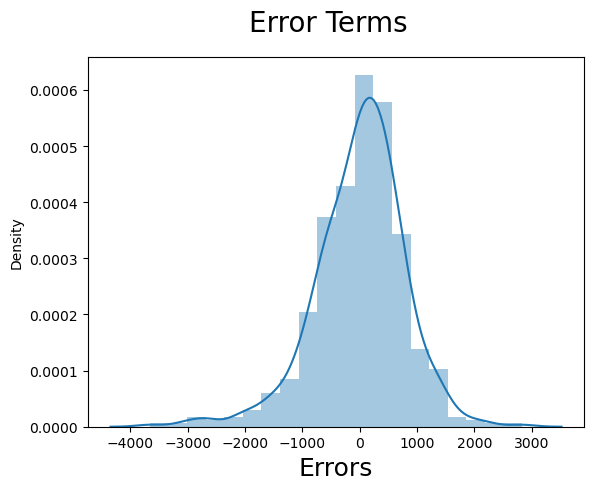

In [108]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Residuals are normally distributed

Text(0, 0.5, 'Residuals')

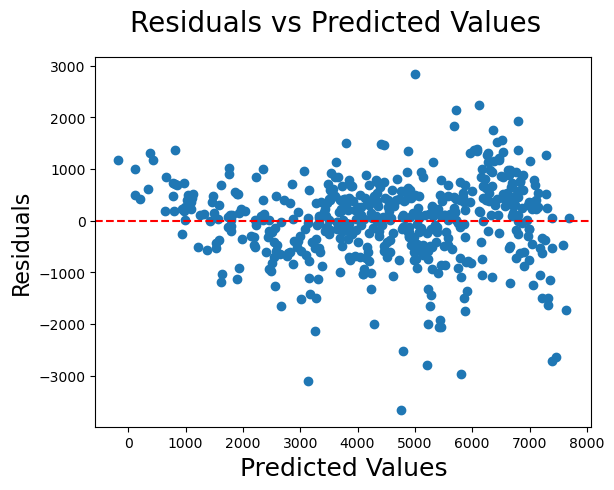

In [111]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.axhline(y=0, color='red', linestyle='--')
fig.suptitle('Residuals vs Predicted Values', fontsize=20)              # Plot heading 
plt.xlabel('Predicted Values', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)                          # Y-label

In [112]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_stat = durbin_watson(y_train - y_train_pred)
print(f"Durbin-Watson statistic: {dw_stat}")
# Values close to 2 indicate no autocorrelation

Durbin-Watson statistic: 2.0495230101005624


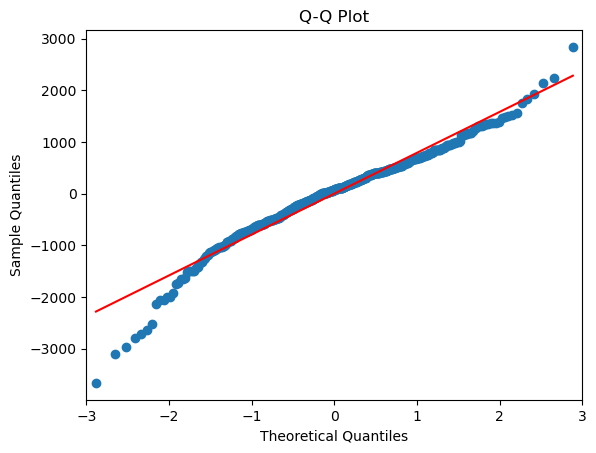

In [113]:
import scipy.stats as stats

# Q-Q Plot
sm.qqplot(y_train - y_train_pred, line='s')
plt.title('Q-Q Plot')
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [116]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [117]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_misty,weathersit_rainy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,False,False,...,False,False,True,False,False,False,False,False,True,False
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,False,True,...,False,False,False,False,True,False,False,False,False,False
299,0,0,1,0.511964,0.496145,0.837699,0.334206,2659,False,False,...,False,False,False,False,False,True,False,False,True,False
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,False,False,...,False,False,False,False,True,False,False,False,False,False
152,0,0,1,0.817246,0.741471,0.314298,0.537414,4968,False,True,...,False,False,False,False,False,True,False,False,False,False


#### Dividing into X_test and y_test

In [119]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test = X_test.astype(float)
y_test = y_test.astype(float)

In [120]:
X_test_6 = sm.add_constant(X_test)

In [121]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_6[X_train_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [122]:
# Making predictions
y_pred = lr_6.predict(X_test_new)

In [123]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8109516074549652


In [124]:
# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.797977698162659

## Model Evaluation

Text(0, 0.5, 'y_pred')

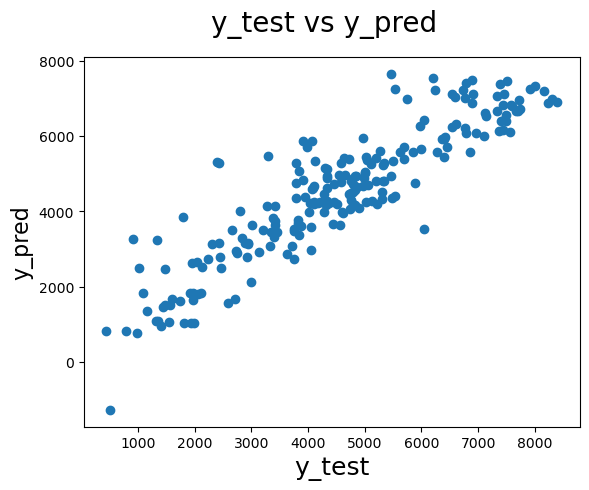

In [126]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt = 1885 + 2039  \times  yr	  - 790  \times  holiday	 + 3888  \times  temp	  - 1318  \times  windspeed	  - 719  \times  season_spring	 
+ 752  \times  season_winter	 + 470  \times  mnth_3	 + 463  \times  mnth_4	 + 558  \times  mnth_5	 + 314  \times  mnth_6
+  791  \times  mnth_9	  - 689  \times  weathersit_misty	  - 2494  \times  weathersit_rainy $


# Final Result

- Train R^2 = 0.835
- Train Adj R^2 = 0.831
- Test R^2 = 0.811
- Test Adj R^2 = 0.798

# Key Predictors Influencing Bike Bookings

Based on our final model, the top three predictor variables that significantly influence bike bookings are:

1. **Temperature (`temp`)**  
   - A coefficient value of **3888** indicates that a one-unit increase in the scaled temperature variable results in an increase of 3888 bike hires.  
   - This highlights the strong positive impact of temperature on demand.

2. **Weather Situation 3 (`weathersit_rainy`)**  
   - A coefficient value of **-2494** indicates that bike bookings decrease by 2494 units on heavily rainy days.  
   - This demonstrates the adverse effect of bad weather on demand.

3. **Year (`yr`)**  
   - A coefficient value of **2039** indicates that a one-unit increase in the year variable leads to an increase of 2039 bike hires.  
   - This can be attributed to year-on-year brand growth and increased popularity.

---

## Additional Influential Variables

While the following predictors are slightly less impactful, they are still worth considering in forecasting and planning:

- **Windspeed**  
  - A coefficient value of **-1318** indicates that a one-unit increase in windspeed decreases bike hires by 1318 units.  
  - Strong winds negatively affect customer willingness to hire bikes.

- **Holiday**  
  - A coefficient value of **-790** indicates that bike bookings drop by 790 units on holidays, possibly due to reduced commuting activity.